***
# HCI Week 6 - Polarimetric Differential Imaging
*Matthew Kenworthy - Leiden Observatory*
***

For the last two weeks we have been focussing on coronagraphs. 
This week you will be looking at imaging data taken with a polariser.


<div class="alert alert-block alert-warning">
<b>PLEASE 1:</b> DO <b>NOT</b> EMAIL BACK THE FITS IMAGES YOU MAKE, ONLY THE .ipynb NOTEBOOK</div>
<div class="alert alert-block alert-warning"> 
<b>PLEASE 2:</b> Upload is by chaning the filename to: <b><i>week06_[lastname].ipynb</b></i> $\leftarrow$ This saves me 
    $$\# \text{ students}_{\text{not using this format}} \times \text{time}_{\text{it takes you to only upload this notebook in this format}} + \text{time}_{\text{it takes me to delete additional files}} $$ </div>
<div class="alert alert-block alert-warning">
<b>PLEASE 3:</b> Do not forget to add axis labels, title, ect to <b>ALL</b> the plots that you have to make!</div>

The data is of a star surrounded by a nearly face-on dust disk. You will carry out difference imaging to remove the unpolarised stellar flux and let the polarised flux shine through. The disk can barely be seen in the intensity image, but is clearly seen in the degree of linear polarization image. 

The polarization state of photons encodes information about the scattering of the photon from dust in circumstellar disks, and from aerosols in planetary atmospheres.

The polarization data is from NaCo, an imaging camera that sits at the Nasmyth focus of the Very Large Telescope (VLT), and the data is taken at a wavelength of 2.15 microns (K band). The data has been kindly provided by Jos de Boer at Leiden Observatory.

NaCo takes two images of an astronomical object through a Wollaston prism, which splits incoming light into two orthogonal polarized images which we will refer to as Left (L) and Right (R).

A Half-Wave Plate is rotated so that **4** different polarization angles are imaged in the sequence 0, 45, 90 and 135 degrees, and two polarized images are taken each time.

The large number of images are taken so that time-varying and detector-varying effects can be removed. You will look at single differencing and double differencing.

In effect, we are determining 3 numerical values for each pixel on the detector - representing $I, Q, U$ - and we have more data than unknown parameters.

<img src="polarization_setup.png" width=500px>

The images themselves measure quantities that are expressed by these equations:

<a id='equation1'></a>

$$ \begin{aligned} 
S_0(L) &= I + Q + Q_{IP}\\
S_1(L) &= I + U + U_{IP}\\
S_2(L) &= I - Q + Q_{IP}\\
S_3(L) &= I - U + U_{IP}
\end{aligned}$$

and

$$ \begin{aligned} 
S_0(R) = I - Q - Q_{IP}\\
S_1(R) = I - U - U_{IP}\\
S_2(R) = I + Q - Q_{IP}\\
S_3(R) = I + U - U_{IP}
\end{aligned}$$

...where $Q_{IP}$ and $U_{IP}$ are the instrumental polarizations - initially, you can assume that these are zero, but when considering double differencing later on, they are nonzero.

In [1]:
%config InlineBackend.figure_format = 'retina' 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def circle_mask(im, xc, yc, rcirc):
    """circle_mask - function that takes the input 2D array 'im' that evaluates the equation 
            (x-x_c)^2 + (y-y_c)^2 < r^2 with circle center coordinates (x_c, y_c) and a radius 'r'
            as input parameters and return a mask array with the same shape as 'im'."""
    ny, nx = im.shape
    y,x = np.mgrid[0:nx,0:ny]
    r = np.sqrt((x-xc)*(x-xc) + (y-yc)*(y-yc))
    return ( (r < rcirc))



---
<span style="  font-size:2em; color: SteelBlue;">Question 6.1</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

****

1. **Read in the data cube from `ORD_EXT_4HWP.fits` into a numpy array. Call it `im`!**
*  **Print out the following parameters:**
   *  **The dimensions in the image contain the `L` and `R` images**
   *  **The different position angles**
   *  **The size and shape of the input images**

<div class="alert alert-block alert-info">
<b>Tip 1:</b> All these parameters can be obtained using Pythons `.shape` method. </div>


<div class="alert alert-block alert-info">
<b>Tip 2:</b> Recall that shapes start from dimention `0`. </div>

---

In [2]:
# Q1 answer here
im, header = fits.getdata('ORD_EXT_4HWP.fits', header=True)
print("The shape of the fits image is: ",im.shape)
print("This stands for the dimension of the image is 4, stands for 4 different polarisations. For each polarisation, there are two images: the L and R-image.\n")
print("There are 4 position angles, namely 0, 45, 90, and 135 degrees.\n")
print("The shape of each image is: ",im[0][0].shape)
# Q1 end of answer

# print('The size of image is {:d}x{:d} pixels'.format(....))
# print('The number of orthogonal frames, both ordinary and extraordinary = {:d}'.format(....))
# print('The number of HWP positions = 0, 22.5, 45 and 67.5 degrees = {:d}'.format(....))

The shape of the fits image is:  (4, 2, 100, 100)
This stands for the dimension of the image is 4, stands for 4 different polarisations. For each polarisation, there are two images: the L and R-image.

There are 4 position angles, namely 0, 45, 90, and 135 degrees.

The shape of each image is:  (100, 100)


## The intensity and difference images

First, we look at the intensity image. Adding the `L` and `R` images together, and averaging over the 4 orientations of the polariser will produce the intensity image `Itot`.

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.2</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

**Calculate `Itot` and display its log$_{10}$ with `ax.imshow`.**

---


In [3]:
# Q2 answer here
def Itot(im):
    num_orient = im.shape[0]
    size = im[0][0].shape[0]
    img = np.zeros((num_orient,size,size))
    for i in range(num_orient):
        img[i] = np.mean(im[i],axis=0)
    return np.mean(img,axis=0)
# Q2 end of answer

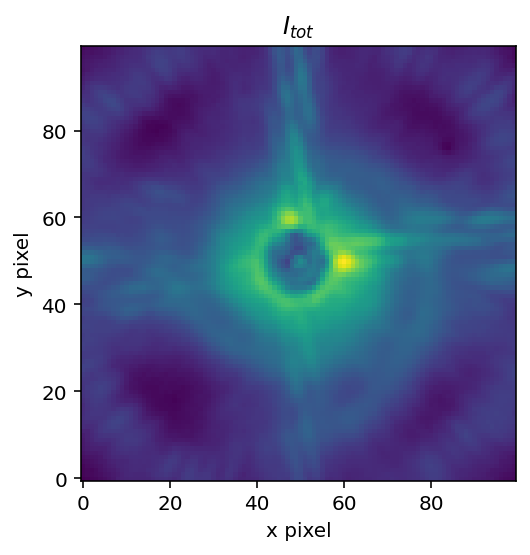

In [4]:
img = Itot(im)
plt.imshow(np.log10(img),origin='lower')
plt.title('$I_{tot}$')
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.show()

Each `L` and `R` image pair are orthogonal polarisations. From the expressions in the [*equations* given before](#equation1) we find that summing and differencing the image pairs will produce an intensity and a polarisation image respectively.

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.3</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

1. **Create `spos` and `sneg`, which are the sum and difference of the `L` and `R` images respectively.**
*  **Write both images out to FITS images (call them `SPOS.fits` and `SNEG.fits`)**
*  **Check that the SNEG images have the butterfly pattern in them in `ds9`.**
*  **Use `imshow` with `vmin=-1000` and `vmax=1000` and display the 0 degree image in `sneg`.**


<div class="alert alert-block alert-info">
<b>SANITY CHECK :</b> Check that you have subtracted the correct dimensions by printing out the <code>shape</code> of both of these arrays. Think about what you expect the <code>shape</code> of the output arrays to be. </div>

5.  **Join dimension 1 of `sneg` and `spos` together into `sdif`. Remember, you will/can use `sdif` in Question 6.13**

<div class="alert alert-block alert-info">
<b>Tip: </b> Joining axes together can be done using the module <code>np.concatenate()</code> </div>

---

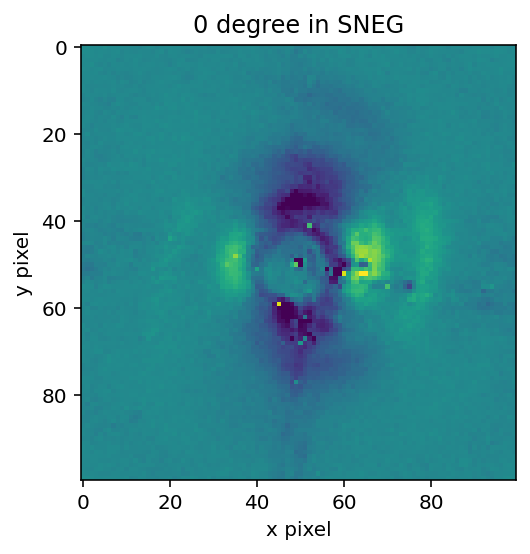

The spos image has shape (4, 100, 100)
The sneg image has shape (4, 100, 100)


In [5]:
# Q3 answer here
def get_spos_sneg(im):
    return np.sum(im,axis=0),(im[0]-im[1])

size = im[0][0].shape[0]
spos = np.zeros((4,size,size))
sneg = np.zeros((4,size,size))
for i in range(4):
    spos[i],sneg[i] = get_spos_sneg(im[i])

plt.imshow(sneg[0],vmin=-1e3,vmax=1e3)
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('0 degree in SNEG')
plt.show()

hdu = fits.PrimaryHDU(spos)
hdu.writeto('SPOS.fits', overwrite=True)
hdu = fits.PrimaryHDU(sneg)
hdu.writeto('SNEG.fits', overwrite=True)

sdif = np.concatenate((spos,sneg),axis=1)
# Q3 end of answer

print("The spos image has shape {}".format(spos.shape))
print("The sneg image has shape {}".format(sneg.shape))

## Making a polarization image

We can now look at the nearly face-on dust disk of the star for the first time by calculating the Polarised Intensity, $I_{pol}$. The polarised itensity is given by $$I_{pol} = \sqrt{Q^2 + U^2}$$. 

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.4</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

**Calculate the polarised intensity by using the `sneg` images**

1. **Define Q to be the first dimension image of `sneg`, and U as the second dimension image of `sneg`.**


<div class="alert alert-block alert-info">
<b>Tip:</b> Think about the numbering of dimentions in Python arrays.. The first dimension is not [1]. </div>


2.  **Calculate the polarised intensity, and call the image `Ipol`**
*  **Display the image `Ipol` in the range $0$ to $1500$.**

**Can you identify the disk already?**

---

In [6]:
#%run ds9 SNEG.fits

In [7]:
# Q4 answer here
def Ipol(im):
    Q = im[0]
    U = im[1]
    return .5*np.sqrt(Q**2+U**2)
Ipol_img = Ipol(sneg)
# Q4 end of answer

print("The Ipol image has shape {}".format(Ipol_img.shape))

The Ipol image has shape (100, 100)


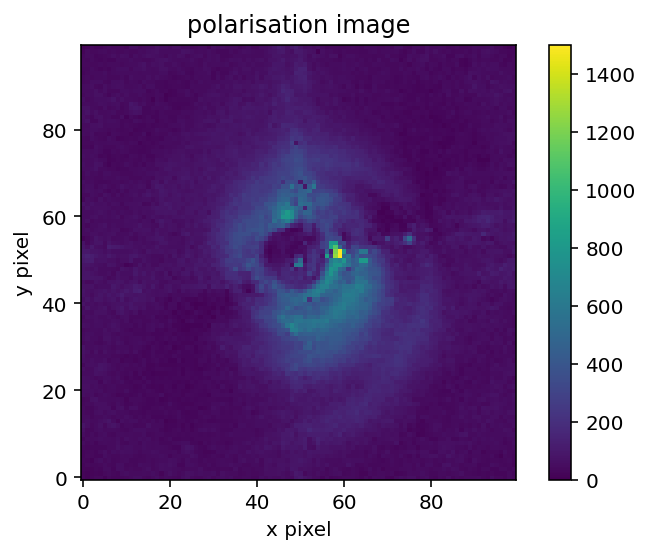

The disk feature can already be seen from the above plot, albeit not with clarity.


In [8]:
plt.imshow(Ipol_img,origin='lower',vmin=0,vmax=1500)
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('polarisation image')
plt.colorbar()
plt.show()
print("The disk feature can already be seen from the above plot, albeit not with clarity.")

## Plotting up the gain in contrast

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.5</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

**Plot the flux of row number 50 in `Itot` as function of pixel. Overplot the same row in `Ipol` on the same graph. Make the y-axis have a logarithmic scale by using `ax=plt.gca()` to get the name of the current plotting window, and `ax.set_yscale('log')` to make it logarithmic.**

<div class="alert alert-block alert-info">
<b>Remember :</b>  Label the axes as "Spatial cut across image [pix]" and a suitable title and units for the y-axis. Add a legend to distinguigh the two plots.</div>

**Describe what you see**

---


There is a positive correlation between Ipol and Itot, since polarisation changes the absolute intensity not the relative intensity.


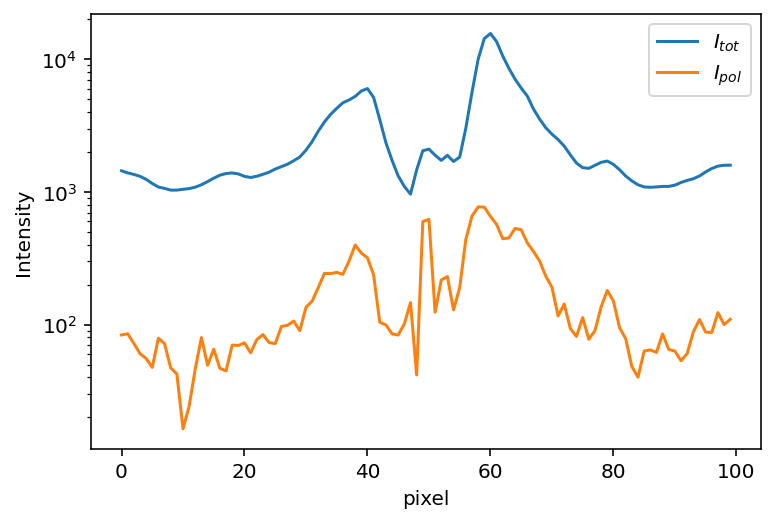

In [9]:
# Q5 answer here

# get the flux of row no. 50 in Itot
# actually with 100*100 pixel image, the central pixel should be 49.5
# so I'm rounding down to 49 here
xcen,ycen = 49,49
Itot_50 = img[xcen]
Ipol_50 = Ipol_img[xcen]
plt.semilogy(Itot_50,label='$I_{tot}$')
plt.semilogy(Ipol_50,label='$I_{pol}$')
plt.xlabel('pixel')
plt.ylabel('Intensity')
plt.legend()
print("There is a positive correlation between Ipol and Itot, since polarisation changes the absolute intensity not the relative intensity.")
# Q5 end of answer

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.6</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span>

**Plot the ratio of the two lines above. By doing so, you get an idea of the fractional polarisation that is measured.**

**Write down what the polarisation level is. Round your answer to whole percentages.**

---

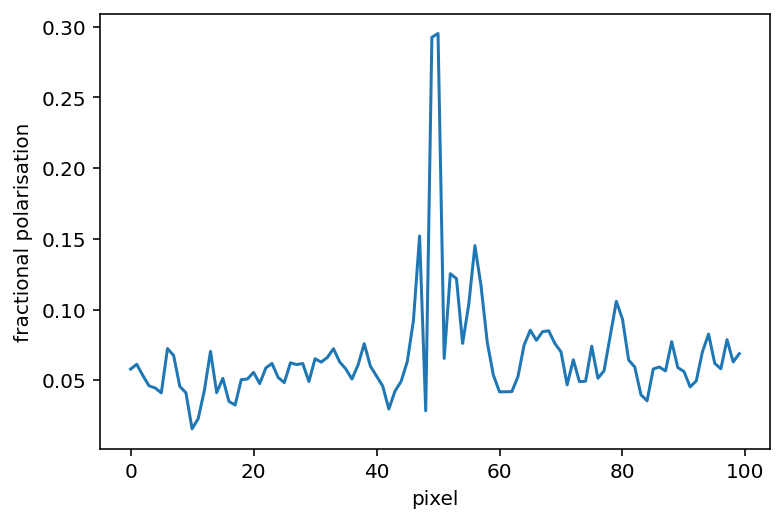

The polarisation level is 7 precent.


In [10]:
# Q6 answer here
ratio = Ipol_50/Itot_50
plt.plot(ratio)
plt.xlabel('pixel')
plt.ylabel('fractional polarisation')
plt.show()
level = ratio.mean()*1e2
# Q6 end of answer

print("The polarisation level is {:.0f} precent.".format(level))


## Double difference

As mentioned in the introduction of this notebook, we have more images than there are parameters to measure. So, why do we have this extra data? We are measuring polarization by comparing intensities of the images. However, there is no guarantee that the transmission of optics forming the `L` and `R` images are the same. In addition, since we have to take a series of images in time, the instrument and the atmospheric conditions may have changed as well.

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.7</span> <span style="  font-size:1em; color: SteelBlue;">
(1 points): </span>

**Using the definitions of $S(L)$ and $S(R)$ from the top of the practicum, write out what `spos` and `sneg` are in terms of `Q` and `U`.**

---
 

You see that you have four independent measurements of `I` and two independent measurements of `Q` and `U` in `spos` and `sneg`.  We can average the values in `spos` together to get `I`, thus combine the $S_0$ and $S_2$ components in `spos` to get `I`. To get `U` and `Q`, we can average the values in `sneg` together.

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.8</span> <span style="  font-size:1em; color: SteelBlue;">
(3 points): </span>

1. **With `sneg`, combine the $S_0$ and $S_2$ values to get a value for `Q`.**
* **Combine the $S_1$ and $S_3$ values to get a value for `U`.**
* **Calculate the polarisation `P` using the same formula as for `Ipol`.**

---

The angle of polarisation $\chi$ indicates the angle between the plane of polarisation and the plane of reference. This angle can be described by the formula:

$$\chi = \frac{1}{2}\arctan(\texttt{U}/\texttt{Q})$$

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.9</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span>

**Calculate the angle of polarisation, $\chi$, using the formula above. Call it `X`**

<div class="alert alert-block alert-info">
<b>Tip :</b> ...using the <code>np.arctan2()</code> function.
</div>
---


### Q7 answer
<a id='equation1'></a>

$$ \begin{aligned} 
S_0(L) &= I + Q + Q_{IP}\\
S_1(L) &= I + U + U_{IP}\\
S_2(L) &= I - Q + Q_{IP}\\
S_3(L) &= I - U + U_{IP}
\end{aligned}$$

and

$$ \begin{aligned} 
S_0(R) = I - Q - Q_{IP}\\
S_1(R) = I - U - U_{IP}\\
S_2(R) = I + Q - Q_{IP}\\
S_3(R) = I + U - U_{IP}
\end{aligned}$$

\begin{equation}
spos = \begin{bmatrix}
S_0(L)+S_0(R)\\
S_1(L)+S_1(R)\\
S_2(L)+S_2(R)\\
S_3(L)+S_3(R)\\
\end{bmatrix}
= \begin{bmatrix}
2I\\
2I\\
2I\\
2I\\
\end{bmatrix}
\end{equation}

\begin{equation}
sneg = \begin{bmatrix}
S_0(L)-S_0(R)\\
S_1(L)-S_1(R)\\
S_2(L)-S_2(R)\\
S_3(L)-S_3(R)\\
\end{bmatrix}
= \begin{bmatrix}
2(Q+Q_{IP})\\
2(U+U_{IP})\\
2(-Q+Q_{IP})\\
2(-U+U_{IP})
\end{bmatrix}
\end{equation}
$$\implies I = \frac{1}{4}\left(spos_0+spos_2\right),Q = \frac{1}{4}\left(sneg_0-sneg_2\right),U = \frac{1}{4}\left(sneg_1-sneg_3\right)$$

In [11]:
# Q7, Q8, Q9 answers here
I = (spos[0]+spos[2])/4
Q = (sneg[0]-sneg[2])/4
U = (sneg[1]-sneg[3])/4
P = np.sqrt(Q**2+U**2)
X = .5*np.arctan2(U,Q)
pol_ang = X.mean()/np.pi*180
print("The polarisation level calculated in this way is {:.0f} percent.".format(np.mean(P[50]/Itot_50*1e2)))
print("The angle of polarisation is {:.2f} degree.".format(pol_ang))
# Q7, Q8, Q9 end of answers 

The polarisation level calculated in this way is 3 percent.
The angle of polarisation is -3.41 degree.


## Polarization image

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.10</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span>

1. **Display the polarisation image with the value range (0,1500) <-- not pixel range.**
2. **Mask out a circle of radius 5 pixels in the middle of the polarisation image.** 
* **Display the masked polarisation image with the same range.**


<div class="alert alert-block alert-info">
<b>Sanity check :</b>  You should see spiral arms in the polarisation image.</div>
---


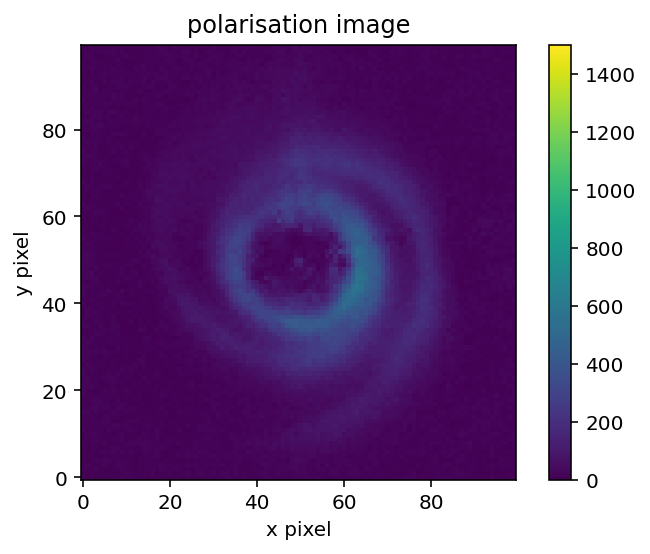

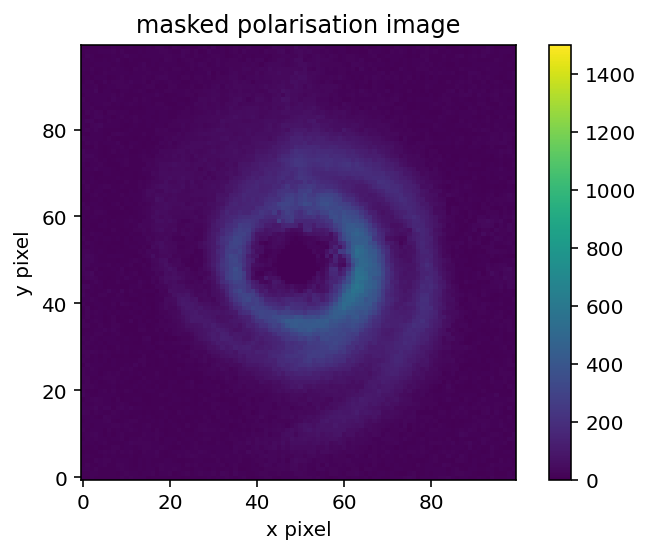

In [12]:
# Q10 answer here
plt.imshow(P,origin='lower',vmin=0,vmax=1500)
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('polarisation image')
plt.colorbar()
plt.show()
msk = circle_mask(P,xcen,ycen,5)
plt.imshow(P*~msk,origin='lower',vmin=0,vmax=1500)
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('masked polarisation image')
plt.colorbar()
plt.show()



# Q10 answer here

## Fractional polarization

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.11</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span>

**Display the fractional polarization (P/I) image from values 0 to 0.10.**


<div class="alert alert-block alert-info">
<b>Recall:</b>  The value of 0.10 in the fractional polarisation image stands for 10% polarisation.</div>

---

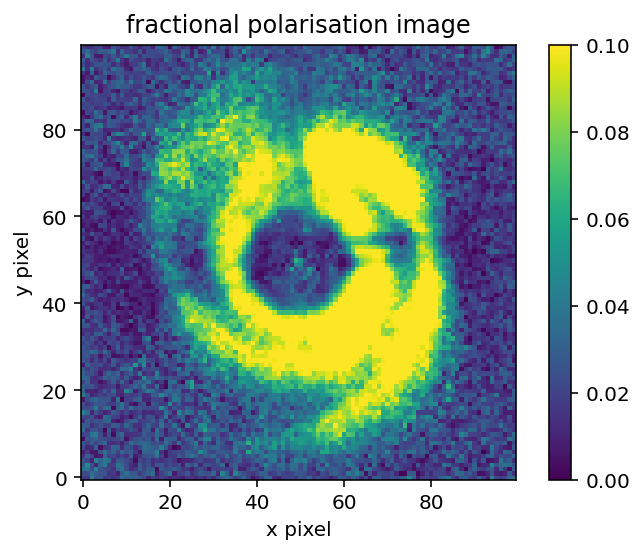

In [13]:
# Q11 answer here

plt.imshow(P/I,vmin=0,vmax=.1,origin='lower')
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('fractional polarisation image')
plt.colorbar()
plt.show()

# Q11 answer here

## Limits of signal to noise by looking at the polarization angle.

The scattered light should be at right angles to the line between any spot on the disk and the central star. Plotting the polarization angle and seeing where it degenerates into noise gives a good indication where the polarization signal lies.

---
<span style="  font-size:2em; color: SteelBlue;">Question 6.12</span> <span style="  font-size:1em; color: SteelBlue;">
(1 point): </span>

**Display the polarisation angle map.**

---

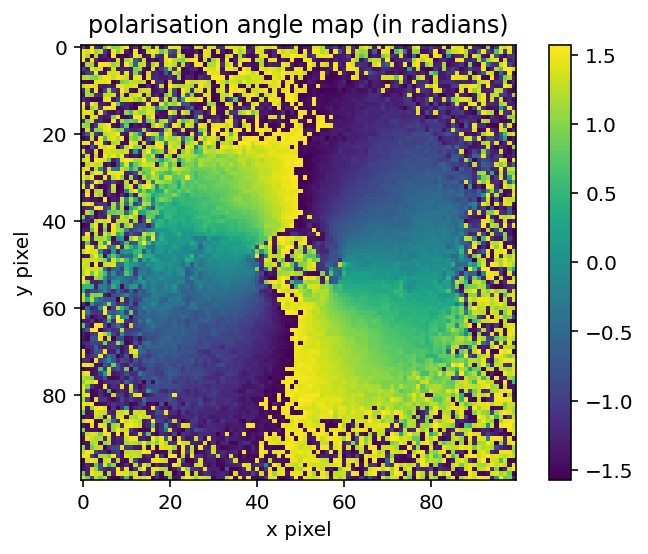

In [14]:
# Q12 answer here
plt.imshow(X)
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('polarisation angle map (in radians)')
plt.colorbar()
plt.show()
# Q12 end of answer


---
<span style="  font-size:2em; color: SteelBlue;">Question 6.13</span> <span style="  font-size:1em; color: SteelBlue;">
(2 points): </span>

**Make a circular annular mask centered on the star that blocks out the star and the noisy polarisation angles at large radii (estimate by eye what outer radius to use).**

**Use this mask to display the spiral arms in the disk in the fractional polarisation image.**


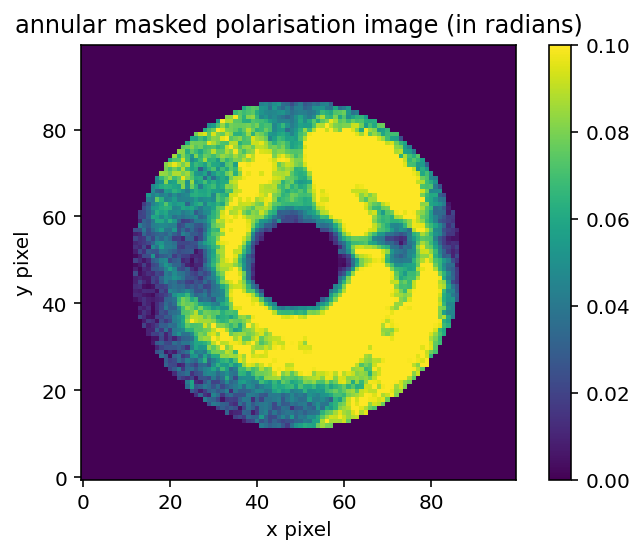

In [15]:
# Q13 answer here
msk1 = circle_mask(P,xcen,ycen,10)
msk2 = circle_mask(P,xcen,ycen,38)
plt.imshow((P/I)*msk2*~msk1,vmin=0,vmax=.1,origin='lower')
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('annular masked polarisation image (in radians)')
plt.colorbar()
plt.show()

# Q13 end of answer


<div class="alert alert-block alert-info">
<b>REMEMBER:</b> to make sure your code compiles cleanly before submitting it! Do only upload the notebook to Brightspace in the correct naming format.</div>


---

<span style="  font-size:2em; color: SteelBlue;">Your time has a value as well</span> 
 </span>

---

### How long did this Practicum take?
Please enter the number of hours you spent on this Practicum (including the time spend besides the time spend during the Lecture) below:


Number of hours taken for this practicum ~7 hours.
